Path: ['S', 'A', 'C', 'G']
Cost: 4


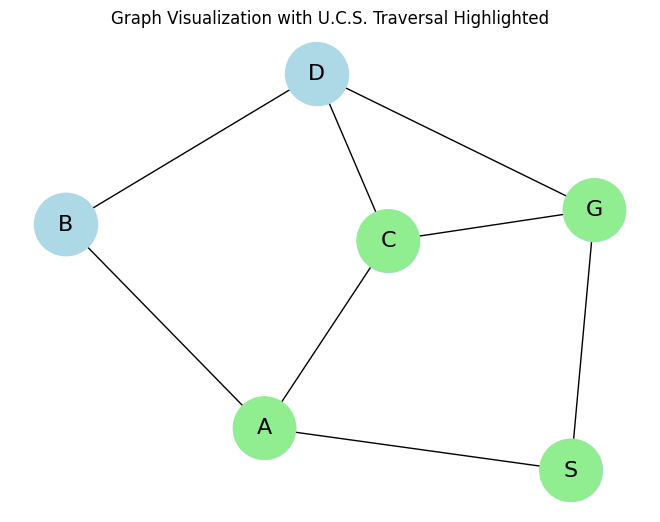

In [17]:
import heapq
import matplotlib.pyplot as plt
import networkx as nx

Graph_nodes = {
    'S': {'A': 1, 'G': 12},
    'A': {'B': 3, 'C': 1},
    'B': {'D': 3},
    'C': {'D': 1, 'G': 2},
    'D': {'G': 3},
    'G': {}
}

def uniform_cost_search(Graph_nodes, start, goal):
    # Priority queue to store the nodes to explore
    queue = []                                          # An empty list queue is created to serve as the priority queue.
    heapq.heappush(queue, (0, start))  # (cost, node)
    # starting node is added to the queue with a cost of 0, indicating that the cost to reach the starting node is zero.
    
    # Dictionary to store the cost of reaching each node
    costs = {start: 0}
    
    # Dictionary to store the parent of each node for path reconstruction
    parents = {start: None}
    
    while queue:    # This loop continues as long as there are nodes in the priority queue to explore. Popping the node with the lowest cost:   
        current_cost, current_node = heapq.heappop(queue)
        
        # If we reach the goal, reconstruct the path
        if current_node == goal:
            path = []
            while current_node is not None:
                path.append(current_node)
                current_node = parents[current_node]
            return path[::-1], current_cost  # Return reversed path and cost
              
        # Explore neighbors
        for neighbor, cost in Graph_nodes[current_node].items():
            new_cost = current_cost + cost
            
            # If this path to neighbor is cheaper, update the cost and parent
            if neighbor not in costs or new_cost < costs[neighbor]:
                costs[neighbor] = new_cost
                parents[neighbor] = current_node
                heapq.heappush(queue, (new_cost, neighbor))
    
    return None, float('inf')  # Return None if no path is found
    
path, cost = uniform_cost_search(Graph_nodes, 'S', 'G')
print("Path:", path)
print("Cost:", cost)

def draw_graph(path):
    G = nx.Graph();
    for node, edges in Graph_nodes.items():
        for neighbor in edges:
            G.add_edge(node, neighbor)
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels = True, node_color = 'lightblue', node_size = 2000, font_size = 16)
    visited_color = ['lightgreen' if node in path else 'lightblue' for node in G.nodes()]
    nx.draw_networkx_nodes(G, pos, node_color = visited_color, node_size = 2000)
    plt.title("Graph Visualization with U.C.S. Traversal Highlighted")
    plt.show()
draw_graph(path)